In [15]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
%%R

require('tidyverse')

In [17]:
%%R

library(ggplot2)
library(dplyr)
library(readr)

In [18]:
%%R

df <- # Read the CSV file
billionaires <- read_csv("GDP_and_Rich1.csv")
df

Rows: 31 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Country
dbl (1): GDP (Billions of USD)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 31 × 2
   Country  `GDP (Billions of USD)`
   <chr>                      <dbl>
 1 Kenya                      113. 
 2 Ghana                       76.3
 3 Peru                       250. 
 4 Egypt                      407  
 5 Morocco                    145. 
 6 Pakistan                   350  
 7 Ethiopia                   130. 
 8 Tanzania                    69.3
 9 Myanmar                     78.2
10 Algeria                    189. 
# ℹ 21 more rows
# ℹ Use `print(n = ...)` to see more rows


In [19]:
%%R

colnames(df)





[1] "Country"               "GDP (Billions of USD)"


Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Income_of_Rich' not found
Run `rlang::last_trace()` to see where the error occurred.


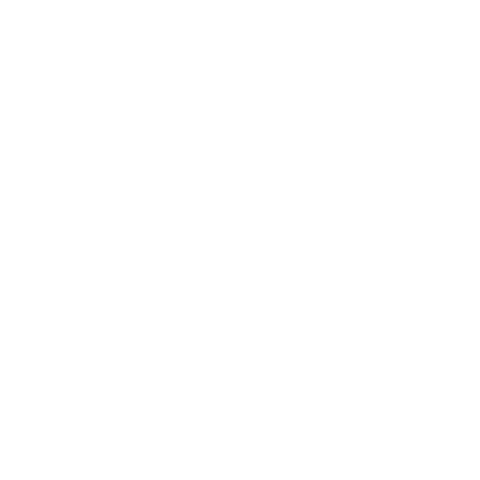

RRuntimeError: Error in geom_bar(stat = "identity", fill = "orange") : 
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Income_of_Rich' not found


In [20]:
%%R


# Bar chart for GDP of lower middle-income countries
ggplot(df, aes(x = reorder(Country, `GDP (Billions of USD)`), y = `GDP (Billions of USD)`)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme_minimal() +
  labs(title = "GDP of Lower Middle-Income Countries",
       x = "Country",
       y = "GDP (Billions of USD)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Bar chart for total income of world's richest 10 people in 2024
ggplot(df, aes(x = reorder(Country, `Income_of_Rich`), y = `Income_of_Rich`)) +
  geom_bar(stat = "identity", fill = "orange") +
  theme_minimal() +
  labs(title = "Income of World's Richest 10 People in 2024",
       x = "Country",
       y = "Income (Billions of USD)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))



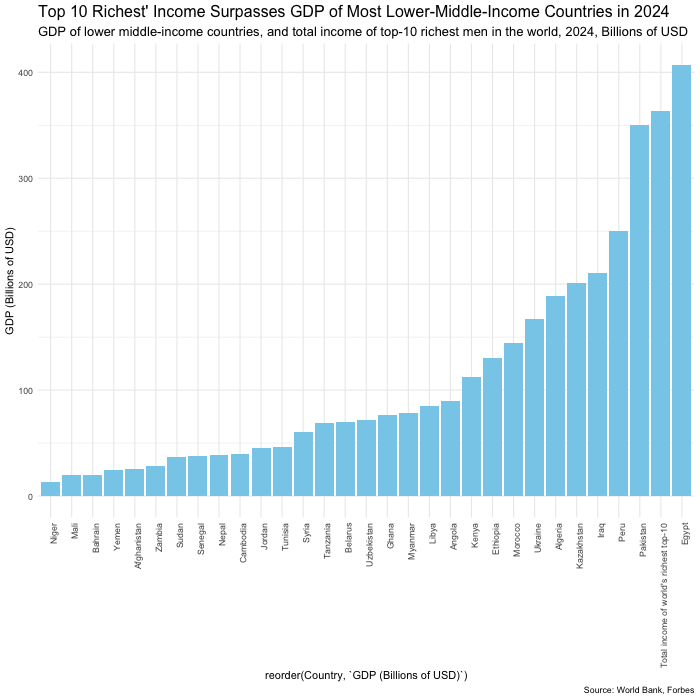

In [24]:
%%R -w 700 -h 700

ggplot(df, aes(x = reorder(Country, `GDP (Billions of USD)`), y = `GDP (Billions of USD)`)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme_minimal() +
  labs(
      title = "Top 10 Richest' Income Surpasses GDP of Most Lower-Middle-Income Countries in 2024",
      subtitle = "GDP of lower middle-income countries, and total income of top-10 richest men in the world, 2024, Billions of USD",
      caption = "Source: World Bank, Forbes"
  ) +
  theme(
    plot.title = element_text(size = 16),
    plot.subtitle = element_text(size = 13),
    legend.position = "top", 
    axis.text.x = element_text(angle = 90, hjust = 1)
)


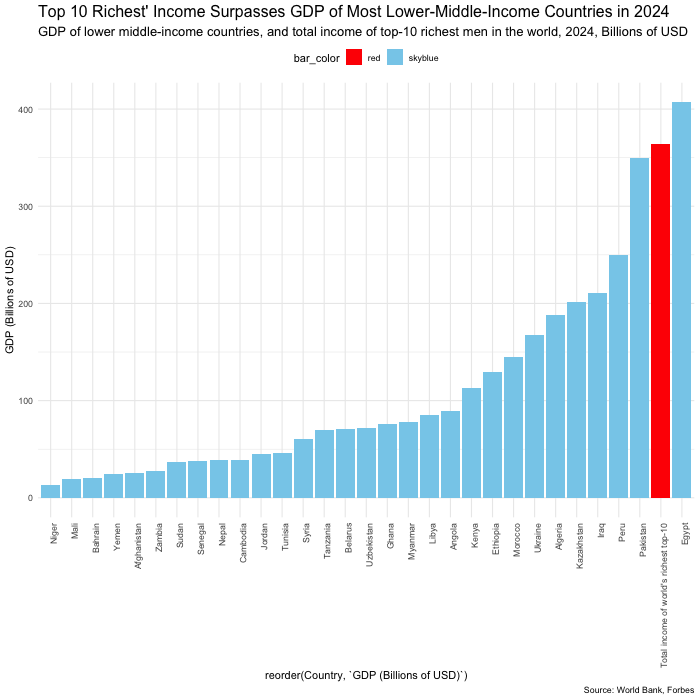

In [25]:
%%R -w 700 -h 700


df$bar_color <- ifelse(df$Country == "Total income of world's richest top-10", "red", "skyblue")


ggplot(df, aes(x = reorder(Country, `GDP (Billions of USD)`), y = `GDP (Billions of USD)`, fill = bar_color)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
      title = "Top 10 Richest' Income Surpasses GDP of Most Lower-Middle-Income Countries in 2024",
      subtitle = "GDP of lower middle-income countries, and total income of top-10 richest men in the world, 2024, Billions of USD",
      caption = "Source: World Bank, Forbes"
  ) +
  theme(
    plot.title = element_text(size = 16),
    plot.subtitle = element_text(size = 13),
    legend.position = "top",
    axis.text.x = element_text(angle = 90, hjust = 1)
  ) +
  scale_fill_manual(values = c("red", "skyblue"))
